In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports do Scikit-Learn para KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

In [2]:
# Load processed data in M1
X_train = pd.read_csv('train_M1_processed.csv')
X_test = pd.read_csv('test_M1_processed.csv')

# Separate features and target (stroke)
y_train = X_train.pop('stroke')
y_test = X_test.pop('stroke')

print(f"Train Shape: ", X_train.shape)

Train Shape:  (26040, 18)


In [3]:
# KNN model configuration
# 1. Create pipeline
# 2. KNN Classifier
knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

# Define hyperparameters grid to test
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan']
}

# Cross Validation
# cv = 5: divide the data iun 5 parts to validate
# scoring='f1': because stroe is unbalanced class
grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=None,
    verbose=1
)

# 3. Training (fitting and cross validation)
print("Training and optimizing KNN...")
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Training and optimizing KNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Maria\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Maria\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Maria\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Best Parameters:  {'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Best score:  0.038829268449206734


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8523
           1       0.03      0.01      0.01       157

    accuracy                           0.98      8680
   macro avg       0.50      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



<Figure size 600x500 with 0 Axes>

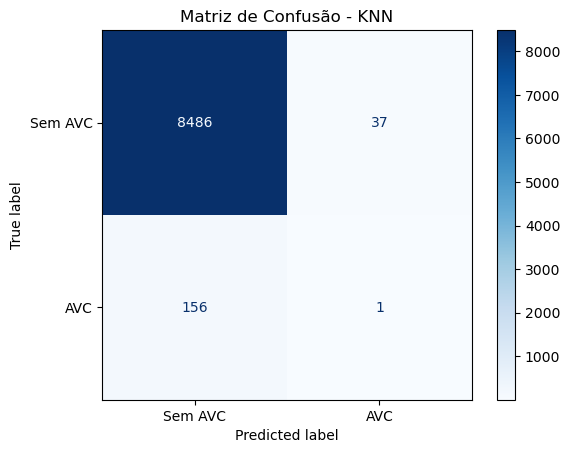

In [4]:
# --- Avaliação Detalhada do KNN ---
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Usar o melhor modelo para prever no teste
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# 2. Relatório Completo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# 3. Visualizar a Matriz de Confusão
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem AVC', 'AVC'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - KNN')
plt.show()

In [ ]:
# SVM (Support Vector Machine) classifier
from sklearn.svm import SVC

# SVM pipeline
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(class_weight='balanced', probability=True, random_state=42)
)

# SVC parameter grid
svm_param_grid = {
    'svc__C': [1, 10],
    'svc__kernel': ['rbf'],
    'svc__gamma': ['scale']
}

svm_search = GridSearchCV(
    svm_pipeline,
    svm_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=None,
    verbose=3
)

print("Training and optimizing SVM...")
svm_search.fit(X_train, y_train)

print("Best Parameters: ", svm_search.best_params_)
print("Best score: ", svm_search.best_score_)

Trainin and optimizing SVM...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END svc__C=1, svc__gamma=scale, svc__kernel=rbf;, score=0.098 total time= 1.3min
[CV 2/3] END svc__C=1, svc__gamma=scale, svc__kernel=rbf;, score=0.099 total time= 1.5min
[CV 3/3] END svc__C=1, svc__gamma=scale, svc__kernel=rbf;, score=0.091 total time= 1.3min
[CV 1/3] END svc__C=10, svc__gamma=scale, svc__kernel=rbf;, score=0.080 total time= 1.1min
[CV 2/3] END svc__C=10, svc__gamma=scale, svc__kernel=rbf;, score=0.093 total time= 1.4min
[CV 3/3] END svc__C=10, svc__gamma=scale, svc__kernel=rbf;, score=0.090 total time= 1.2min
Best Parameters:  {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best score:  0.09561080888481184
